In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Segmentation (KMeans / DBSCAN + PCA/t‑SNE)
##  Import thư viện phân cụm khách hàng
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Thêm thư viện Dự đoán hành vi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

# Data_Import_Exploration

In [ ]:
#Đọc file Ecommerce_Consumer_Behavior_Analysis_Data.csv => đưa dữ liệu vào data
data = pd.read_csv("Ecommerce_Consumer_Behavior_Analysis_Data.csv")

In [ ]:
# Cho biết kiểu dữ liệu (type) của data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Cho biết kích thước (shape) của data
print(data.shape)

(1000, 28)


In [ ]:
# Hiển thị 5 dòng dữ liệu đầu tiên (head) của data
print(data.head())

   Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0  37-611-6911   22  Female       Middle        Married      Bachelor's   
1  29-392-9296   49    Male         High        Married     High School   
2  84-649-5117   24  Female       Middle         Single        Master's   
3  48-980-6078   29  Female       Middle         Single        Master's   
4  91-170-9072   33  Female       Middle        Widowed     High School   

  Occupation  Location     Purchase_Category Purchase_Amount  ...  \
0     Middle      Évry  Gardening & Outdoors        $333.80   ...   
1       High  Huocheng      Food & Beverages        $222.22   ...   
2       High    Huzhen       Office Supplies        $426.22   ...   
3     Middle    Wiwilí       Home Appliances        $101.31   ...   
4     Middle      Nara             Furniture        $211.70   ...   

   Customer_Satisfaction Engagement_with_Ads  Device_Used_for_Shopping  \
0                      7                 NaN                

In [ ]:
# Hiển thị 5 dòng dữ liệu cuối (tail) của data
print(data.tail())

     Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
995  20-562-2569   44  Female         High       Divorced      Bachelor's   
996  41-366-4205   50  Female         High         Single     High School   
997  77-241-7621   26    Male         High        Married      Bachelor's   
998  53-091-2176   21  Female         High        Widowed      Bachelor's   
999  48-203-9118   21  Female       Middle         Single     High School   

    Occupation    Location     Purchase_Category Purchase_Amount  ...  \
995       High   Aramayuan    Mobile Accessories        $463.67   ...   
996     Middle     Paquera  Gardening & Outdoors         $69.78   ...   
997       High  Warudoyong      Food & Beverages        $453.37   ...   
998     Middle     Béziers         Baby Products        $106.15   ...   
999       High    Dongzhou           Health Care        $378.47   ...   

     Customer_Satisfaction Engagement_with_Ads  Device_Used_for_Shopping  \
995                   

In [ ]:
# Cho biết kiểu dữ liệu (dtype) của các cột của data
print(data.dtypes)

Customer_ID                               object
Age                                        int64
Gender                                    object
Income_Level                              object
Marital_Status                            object
Education_Level                           object
Occupation                                object
Location                                  object
Purchase_Category                         object
Purchase_Amount                           object
Frequency_of_Purchase                      int64
Purchase_Channel                          object
Brand_Loyalty                              int64
Product_Rating                             int64
Time_Spent_on_Product_Research(hours)    float64
Social_Media_Influence                    object
Discount_Sensitivity                      object
Return_Rate                                int64
Customer_Satisfaction                      int64
Engagement_with_Ads                       object
Device_Used_for_Shop

In [ ]:
# Xem thông tin (info) của data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [ ]:
# Đếm số lượng giá trị thiếu ở mỗi cột
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # chỉ hiển thị cột có thiếu
missing_values

Social_Media_Influence    247
Engagement_with_Ads       256
dtype: int64

# Cleaned_Data

In [ ]:
# Xem thông tin tổng quan
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [ ]:
# Kiểm tra số lượng hàng trùng lặp
duplicates = data.duplicated().sum()
print(f"Số lượng hàng trùng lặp: {duplicates}")

# Loại bỏ hàng trùng lặp
data = data.drop_duplicates()

Số lượng hàng trùng lặp: 0


In [ ]:
# Loại bỏ ký tự $ và chuyển đổi thành số
data['Purchase_Amount'] = data['Purchase_Amount'].replace(r'[\$,]', '', regex=True).astype(float)

# Chuyển đổi định dạng ngày tháng
data['Time_of_Purchase'] = pd.to_datetime(data['Time_of_Purchase'])
# Thêm cột Month
data['Month'] = data['Time_of_Purchase'].dt.month

# Kiểm tra kết quả
print(data[['Purchase_Amount', 'Time_of_Purchase', 'Month']].head())

   Purchase_Amount Time_of_Purchase  Month
0           333.80       2024-03-01      3
1           222.22       2024-04-16      4
2           426.22       2024-03-15      3
3           101.31       2024-10-04     10
4           211.70       2024-01-30      1


In [ ]:
# Phân tích cột Social_Media_Influence
smi_unique = data['Social_Media_Influence'].unique()
smi_mode = data['Social_Media_Influence'].mode()[0]
smi_counts = data['Social_Media_Influence'].value_counts()

print("=== Social Media Influence ===")
print("Các giá trị duy nhất:", smi_unique)
print("Giá trị phổ biến nhất:", smi_mode)
print("Tần suất xuất hiện:\n", smi_counts)
print()

# Phân tích cột Engagement_with_Ads
ewa_unique = data['Engagement_with_Ads'].unique()
ewa_mode = data['Engagement_with_Ads'].mode()[0]
ewa_counts = data['Engagement_with_Ads'].value_counts()

print("=== Engagement with Ads ===")
print("Các giá trị duy nhất:", ewa_unique)
print("Giá trị phổ biến nhất:", ewa_mode)
print("Tần suất xuất hiện:\n", ewa_counts)

=== Social Media Influence ===
Các giá trị duy nhất: [nan 'Medium' 'Low' 'High']
Giá trị phổ biến nhất: High
Tần suất xuất hiện:
 Social_Media_Influence
High      268
Low       249
Medium    236
Name: count, dtype: int64

=== Engagement with Ads ===
Các giá trị duy nhất: [nan 'High' 'Low' 'Medium']
Giá trị phổ biến nhất: High
Tần suất xuất hiện:
 Engagement_with_Ads
High      270
Medium    244
Low       230
Name: count, dtype: int64


In [ ]:
# Điền giá trị phổ biến nhất cho các cột bị thiếu
data['Social_Media_Influence'] = data['Social_Media_Influence'].fillna(data['Social_Media_Influence'].mode()[0])
data['Engagement_with_Ads'] = data['Engagement_with_Ads'].fillna(data['Engagement_with_Ads'].mode()[0])

# Kiểm tra lại
print(data[['Social_Media_Influence', 'Engagement_with_Ads']].isnull().sum())

Social_Media_Influence    0
Engagement_with_Ads       0
dtype: int64


(1000, 29)


In [ ]:
# Chuẩn hóa dữ liệu chuỗi
data['Location'] = data['Location'].str.strip().str.lower()
data['Purchase_Category'] = data['Purchase_Category'].str.strip().str.lower()

# Kiểm tra lại
print(data[['Location', 'Purchase_Category']].head())

   Location     Purchase_Category
0      évry  gardening & outdoors
1  huocheng      food & beverages
2    huzhen       office supplies
3    wiwilí       home appliances
4      nara             furniture


In [ ]:
data.to_csv("Cleaned_Ecommerce_Data.csv", index=False)

# EDA - Exploratory Data Analysis

In [ ]:
# Cài đặt style cho biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### Phân tích dữ liệu khám phá (EDA - Exploratory Data Analysis)

##### Nội Dung
- Phân phối **tuổi** (Age)
- Tỉ lệ **giới tính** (Gender)
- Trình độ **học vấn** (Education_Level)
- **Nghề nghiệp** (Occupation)
- Tình trạng **hôn nhân** (Marital_Status)
- **Mức thu nhập** (Income_Level)

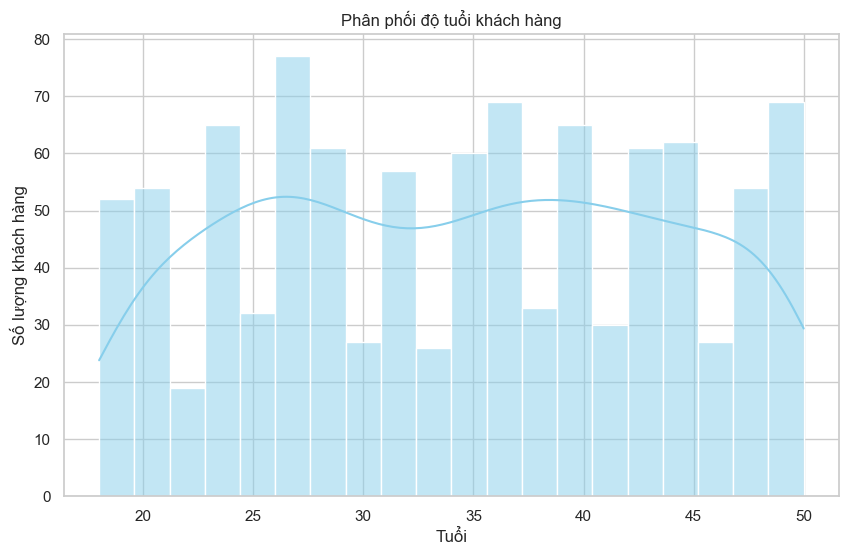

In [ ]:
# Phân phối tuổi (Age)
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title("Phân phối độ tuổi khách hàng")
plt.xlabel("Tuổi")
plt.ylabel("Số lượng khách hàng")
plt.show()

### Nhận xét:
Khách hàng phân bổ khá đều từ 18 đến 50 tuổi, trong đó nổi bật là hai nhóm tuổi 34–37 và 46–50 với lượng khách cao nhất. Tuy nhiên, nhóm 24–30 tuổi cũng chiếm tỷ trọng lớn, cho thấy đây là nhóm khách hàng trẻ tiềm năng, kết hợp giữa độ tuổi sẵn sàng chi tiêu và sự quen thuộc với công nghệ.Phân bố độ tuổi khách hàng trải rộng, cho thấy doanh nghiệp đang phục vụ đa dạng thế hệ. Nhóm tuổi 24–30 và 34–37 có số lượng cao, là các độ tuổi đang trong giai đoạn ổn định thu nhập và chi tiêu mạnh. Nhóm 46–50 cũng bất ngờ chiếm tỷ trọng lớn, cho thấy sức mua từ nhóm khách trung niên không thể bỏ qua.
Chiến lược nên đồng thời nhắm đến cả người trẻ thành thị và người tiêu dùng lớn tuổi có khả năng tài chính ổn định.

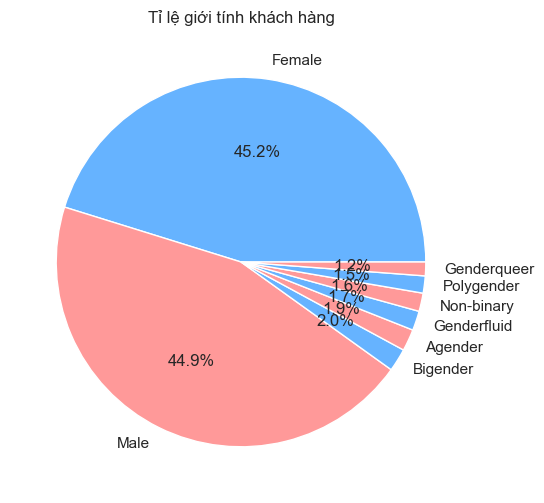

In [ ]:
# Tỉ lệ giới tính (Gender)
plt.figure(figsize=(6, 6))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Tỉ lệ giới tính khách hàng")
plt.show()

### Nhận xét:
Nam và nữ chiếm tỷ lệ gần tương đương, lần lượt là 45.2% và 44.9%, cho thấy không có sự chênh lệch đáng kể giữa hai giới tính phổ biến này.
Nhóm khách hàng phi nhị nguyên giới (non-binary và các biến thể khác) chiếm tổng cộng 9.9%, phản ánh sự đa dạng giới tính trong tập khách hàng – một yếu tố cần được lưu tâm trong truyền thông và thiết kế trải nghiệm số.
Trái với giả định ban đầu rằng “nữ chiếm 60%”, dữ liệu thực tế cho thấy doanh nghiệp nên định hướng chiến lược trung hòa giới tính, đồng thời đảm bảo sự hòa nhập cho nhóm LGBTQ+. Tập khách hàng có giới tính đa dạng với tỷ lệ nam và nữ gần như ngang nhau (~45%), cùng một tỷ lệ đáng kể thuộc các nhóm phi nhị nguyên. Doanh nghiệp nên xây dựng chiến lược trung lập giới và cá nhân hóa trải nghiệm để phù hợp với sự đa dạng này.

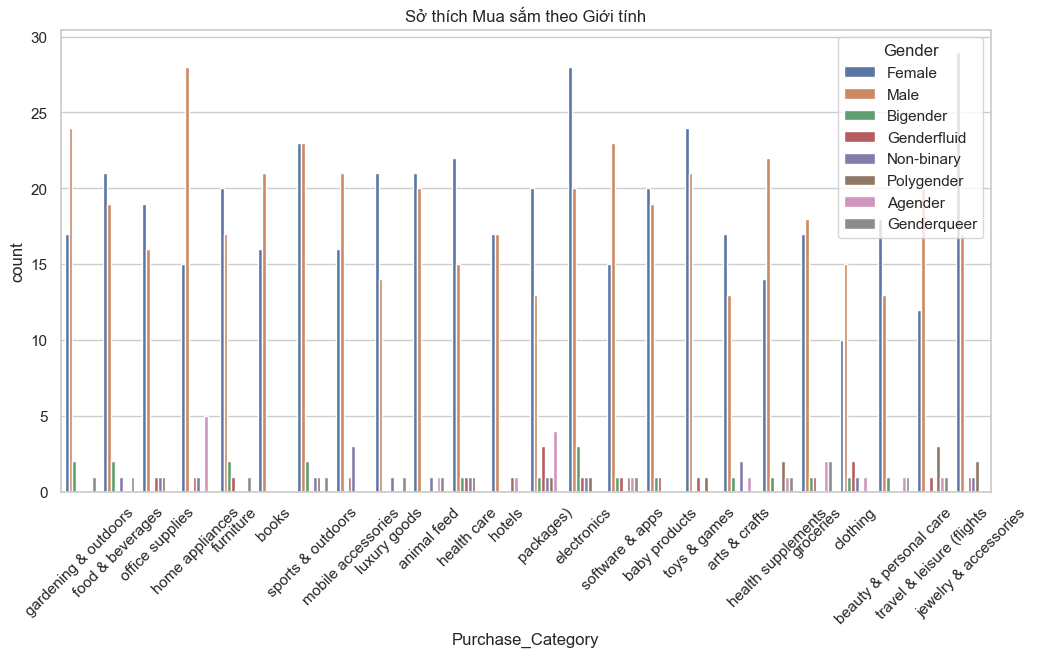

In [ ]:
# Barplot sở thích mua sắm theo giới tính
plt.figure(figsize=(12, 6))
sns.countplot(x='Purchase_Category', hue='Gender', data=data)
plt.title('Sở thích Mua sắm theo Giới tính')
plt.xticks(rotation=45)
plt.show()

### Nhận xét:
Biểu đồ thể hiện sự khác biệt rõ rệt về sở thích mua sắm giữa các nhóm giới tính. Nam giới thường ưa chuộng các sản phẩm công nghệ, du lịch và đồ ăn thức uống, trong khi nữ giới quan tâm nhiều hơn đến thời trang, làm đẹp và nội thất. Các nhóm giới tính khác như Non-binary hay Genderqueer tuy chiếm tỷ lệ nhỏ nhưng thể hiện sự đa dạng trong hành vi tiêu dùng. Kết quả cho thấy giới tính là yếu tố quan trọng ảnh hưởng đến hành vi mua sắm, từ đó giúp doanh nghiệp xây dựng chiến lược tiếp thị phù hợp cho từng nhóm khách hàng.

C:\Users\DELL\AppData\Local\Temp\ipykernel_19300\997814461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Education_Level', palette='Set2', order=data['Education_Level'].value_counts().index)


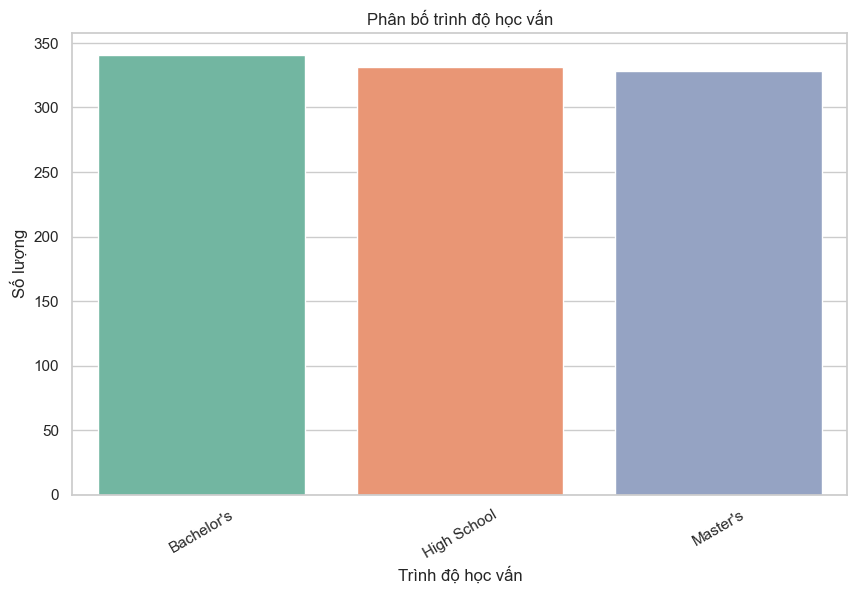

In [ ]:
# Trình độ học vấn (Education_Level)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Education_Level', palette='Set2', order=data['Education_Level'].value_counts().index)
plt.title("Phân bố trình độ học vấn")
plt.xlabel("Trình độ học vấn")
plt.ylabel("Số lượng")
plt.xticks(rotation=30)
plt.show()

### Nhận xét:
Khách hàng trên nền tảng thương mại điện tử có trình độ học vấn cao, với số lượng gần như ngang nhau giữa ba nhóm: Cử nhân (khoảng 341 người), Trung học (khoảng 331 người) và Thạc sĩ (khoảng 328 người). Điều này cho thấy doanh nghiệp đang tiếp cận một tệp khách hàng có hiểu biết, quen thuộc với công nghệ và có khả năng chi tiêu ổn định. Với đặc điểm này, hành vi mua sắm của họ nhiều khả năng chịu ảnh hưởng bởi các yếu tố lý tính như thông tin sản phẩm chi tiết, đánh giá người dùng và độ tin cậy của thương hiệu.
Do đó, doanh nghiệp nên tập trung phát triển nội dung truyền thông chuyên sâu, chú trọng đến trải nghiệm mua sắm thông minh và minh bạch. Ngoài ra, đây cũng là nhóm tiềm năng cho các sản phẩm cao cấp hoặc gói dịch vụ giá trị gia tăng.

C:\Users\DELL\AppData\Local\Temp\ipykernel_19300\2759710832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Occupation', palette='Set3', order=data['Occupation'].value_counts().index)


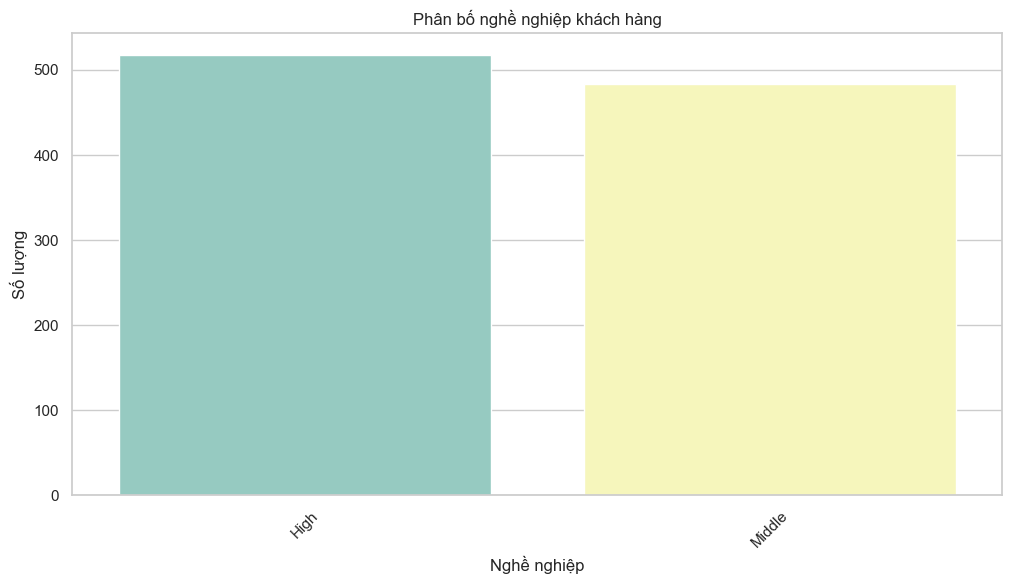

In [ ]:
#Nghề nghiệp (Occupation)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Occupation', palette='Set3', order=data['Occupation'].value_counts().index)
plt.title("Phân bố nghề nghiệp khách hàng")
plt.xlabel("Nghề nghiệp")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.show()

### Nhận xét:
Biểu đồ cho thấy phân bố khách hàng theo nghề nghiệp tập trung chủ yếu ở hai nhóm: "High" và "Middle". Nhóm "High" chiếm tỷ lệ lớn hơn một chút với hơn 520 người, trong khi nhóm "Middle" có gần 500 người. Sự chênh lệch không đáng kể cho thấy cơ cấu nghề nghiệp của khách hàng khá cân bằng. Dữ liệu nghề nghiệp có thể đã được phân loại theo mức thu nhập hoặc cấp bậc chuyên môn. Đây là cơ sở tốt để kết hợp với các yếu tố khác như thu nhập, độ tuổi hoặc hành vi chi tiêu nhằm phân tích sâu hơn.

C:\Users\DELL\AppData\Local\Temp\ipykernel_19300\2707020367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Marital_Status', palette='pastel', order=data['Marital_Status'].value_counts().index)


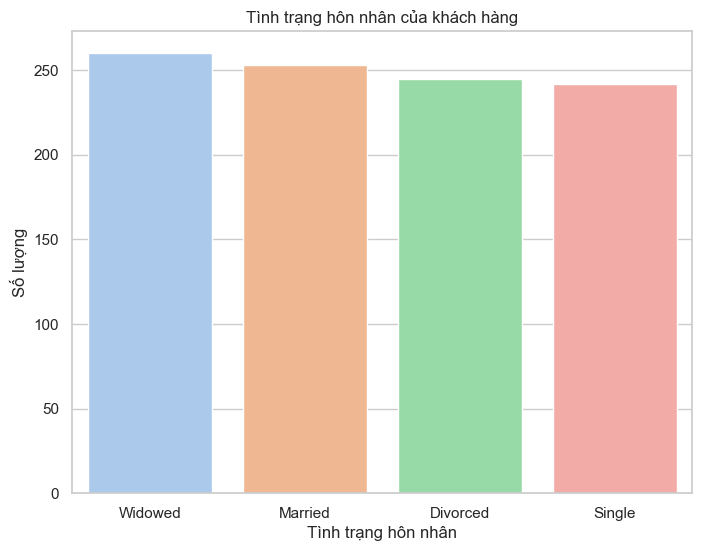

In [ ]:
# Tình trạng hôn nhân (Marital_Status)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Marital_Status', palette='pastel', order=data['Marital_Status'].value_counts().index)
plt.title("Tình trạng hôn nhân của khách hàng")
plt.xlabel("Tình trạng hôn nhân")
plt.ylabel("Số lượng")
plt.show()

### Nhận xét:
Dữ liệu về tình trạng hôn nhân cho thấy sự phân bổ khá đồng đều giữa bốn nhóm: Đã kết hôn (253), Độc thân (242), Ly hôn (245) và Góa (260). Điều này phản ánh một tập khách hàng đa dạng về mặt lối sống và nhu cầu mua sắm. Nhóm đã kết hôn có xu hướng chi tiêu cho gia đình, trong khi người độc thân có thể ưu tiên trải nghiệm cá nhân và các sản phẩm tiện ích. Đáng chú ý, tỷ lệ người đã ly hôn và góa chiếm tỷ trọng lớn, mở ra cơ hội tiếp cận một nhóm khách hàng có xu hướng độc lập tài chính và nhiều tiềm năng chi tiêu. Việc nắm bắt đúng nhu cầu theo từng tình trạng hôn nhân sẽ giúp doanh nghiệp tối ưu hóa thông điệp truyền thông và thiết kế gói sản phẩm phù hợp với từng phân khúc.

C:\Users\DELL\AppData\Local\Temp\ipykernel_19300\2724185086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Income_Level', palette='coolwarm', order=data['Income_Level'].value_counts().index)


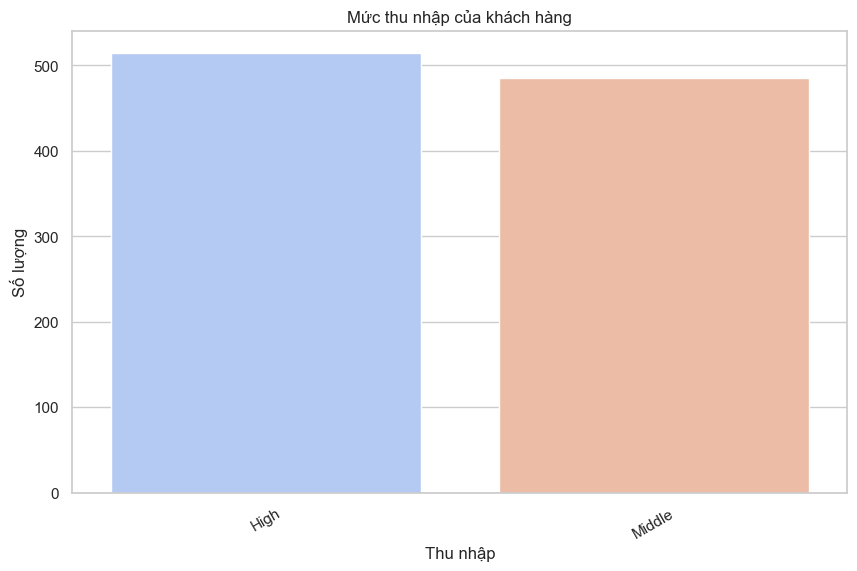

In [ ]:
# Mức thu nhập (Income_Level)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Income_Level', palette='coolwarm', order=data['Income_Level'].value_counts().index)
plt.title("Mức thu nhập của khách hàng")
plt.xlabel("Thu nhập")
plt.ylabel("Số lượng")
plt.xticks(rotation=30)
plt.show()

### Nhận xét:
Biểu đồ thể hiện mức thu nhập của khách hàng chủ yếu rơi vào hai nhóm: “High” và “Middle”. Nhóm thu nhập cao (“High”) chiếm tỷ lệ nhỉnh hơn với hơn 510 người, trong khi nhóm thu nhập trung bình (“Middle”) có khoảng 490 người. Sự phân bố này tương đối đồng đều, cho thấy tệp khách hàng có sự đa dạng nhất định về khả năng chi tiêu. Điều này mở ra cơ hội để doanh nghiệp phân loại và xây dựng các chiến lược tiếp thị cá nhân hóa phù hợp với từng phân khúc thu nhập.

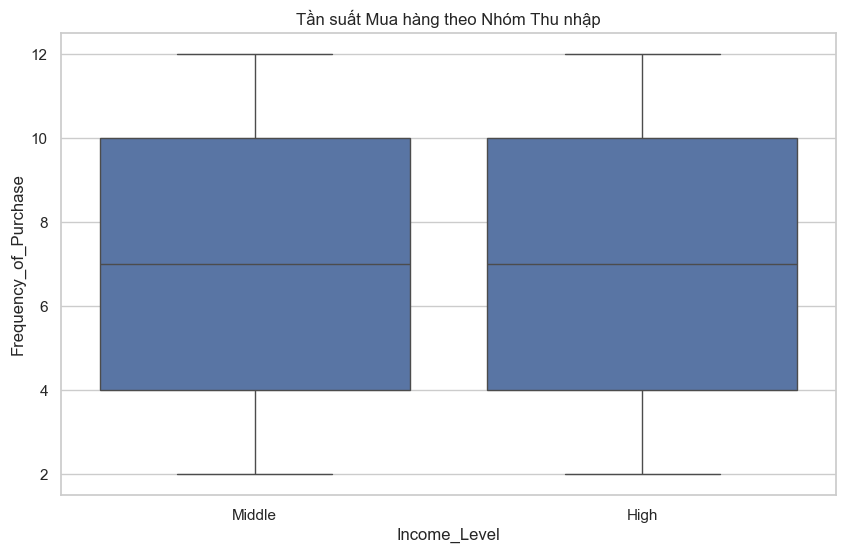

In [ ]:
# Boxplot tần suất mua hàng theo thu nhập
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Level', y='Frequency_of_Purchase', data=data)
plt.title('Tần suất Mua hàng theo Nhóm Thu nhập')
plt.show()

### Nhận xét:
Biểu đồ boxplot về Tần suất mua hàng theo Nhóm Thu nhập cho thấy mức độ tương đồng đáng kể giữa hai nhóm Middle và High. Trung vị tần suất mua hàng của cả hai nhóm đều nằm ở mức trung bình khá (khoảng 7 lần), với phạm vi tần suất trải dài từ 2 đến 12 lần. Điều này chỉ ra rằng thu nhập không phải là yếu tố quyết định rõ ràng đến tần suất mua hàng – cả khách hàng thu nhập trung bình và cao đều có hành vi mua sắm thường xuyên tương đương. Từ đó, chiến lược tiếp cận nên tập trung nhiều hơn vào yếu tố hành vi và nhu cầu thực tế, thay vì chỉ dựa trên mức thu nhập.

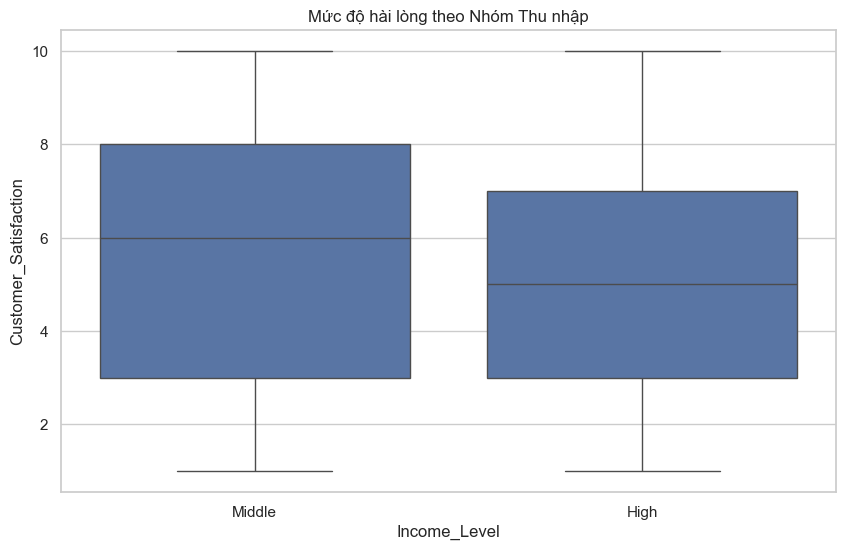

In [ ]:
# Vẽ boxplot mức độ hài lòng theo thu nhập
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Level', y='Customer_Satisfaction', data=data)
plt.title('Mức độ hài lòng theo Nhóm Thu nhập')
plt.show()

### Nhận xét:
Biểu đồ boxplot thể hiện mức độ hài lòng của khách hàng theo nhóm thu nhập cho thấy sự khác biệt đáng chú ý giữa hai nhóm Middle và High. Trung vị mức độ hài lòng của nhóm thu nhập trung bình cao hơn so với nhóm thu nhập cao. Đồng thời, nhóm thu nhập trung bình cũng có mức độ phân tán rộng hơn, nghĩa là có nhiều khách hàng cực kỳ hài lòng, trong khi nhóm thu nhập cao lại tập trung quanh mức trung bình thấp hơn. Điều này có thể phản ánh kỳ vọng cao hơn từ nhóm thu nhập cao, dẫn đến mức độ hài lòng không cao như mong đợi. Doanh nghiệp nên chú trọng cải thiện trải nghiệm và giá trị dịch vụ cho nhóm khách hàng thu nhập cao để đáp ứng tốt hơn kỳ vọng của họ.

# Purchase_Behavior

In [ ]:
df=data

In [ ]:
# Thiết lập style mặc định và kích thước hình
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

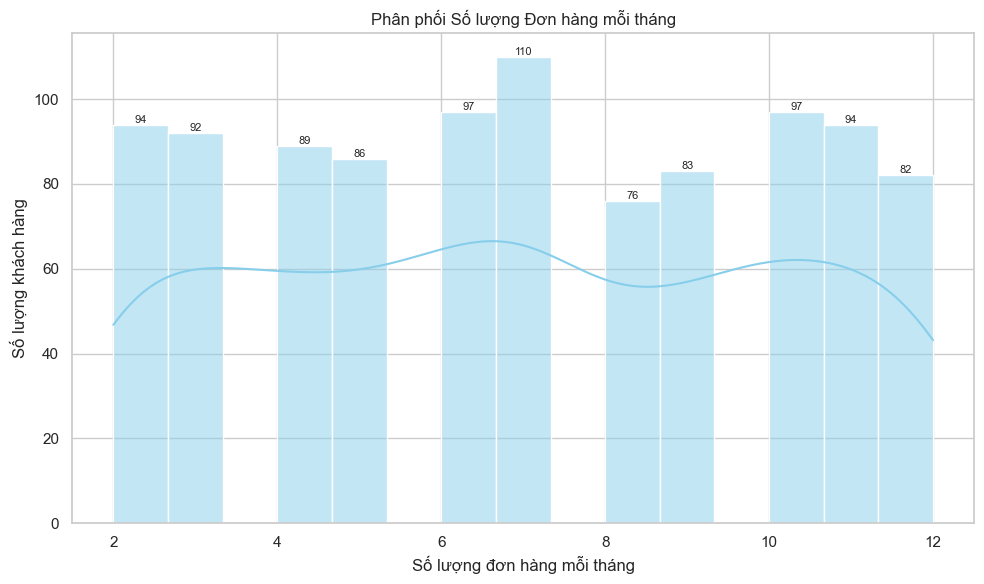

In [ ]:
# 1. Tổng số đơn hàng (Frequency_of_Purchase)
plt.figure()
ax = sns.histplot(data['Frequency_of_Purchase'], bins=15, kde=True, color='skyblue')
plt.title("Phân phối Số lượng Đơn hàng mỗi tháng")
plt.xlabel("Số lượng đơn hàng mỗi tháng")
plt.ylabel("Số lượng khách hàng")
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)
plt.tight_layout()

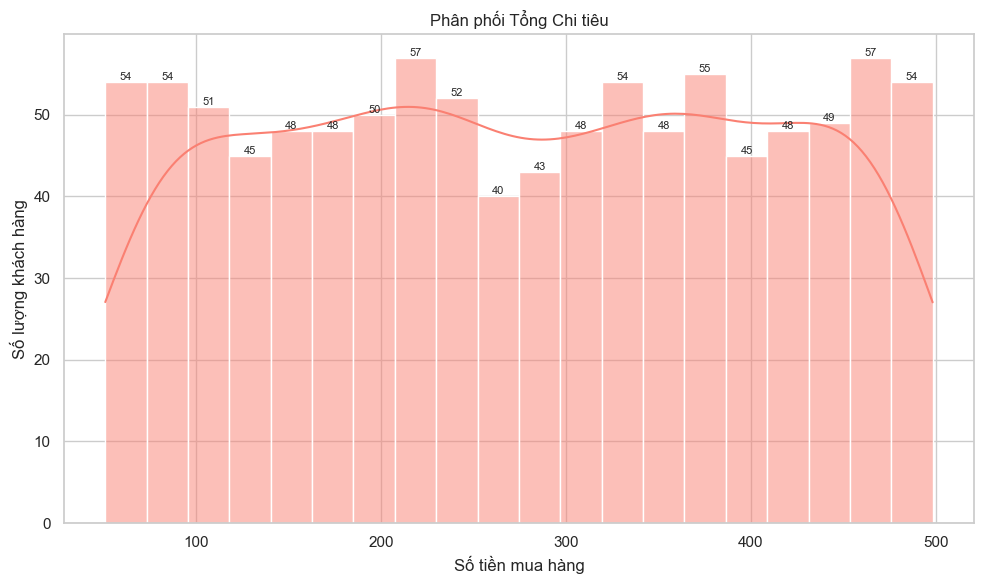

In [ ]:
# 2. Tổng chi tiêu (Purchase_Amount)
plt.figure()
ax = sns.histplot(df['Purchase_Amount'], bins=20, kde=True, color='salmon')
plt.title("Phân phối Tổng Chi tiêu")
plt.xlabel("Số tiền mua hàng")
plt.ylabel("Số lượng khách hàng")
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)
plt.tight_layout()

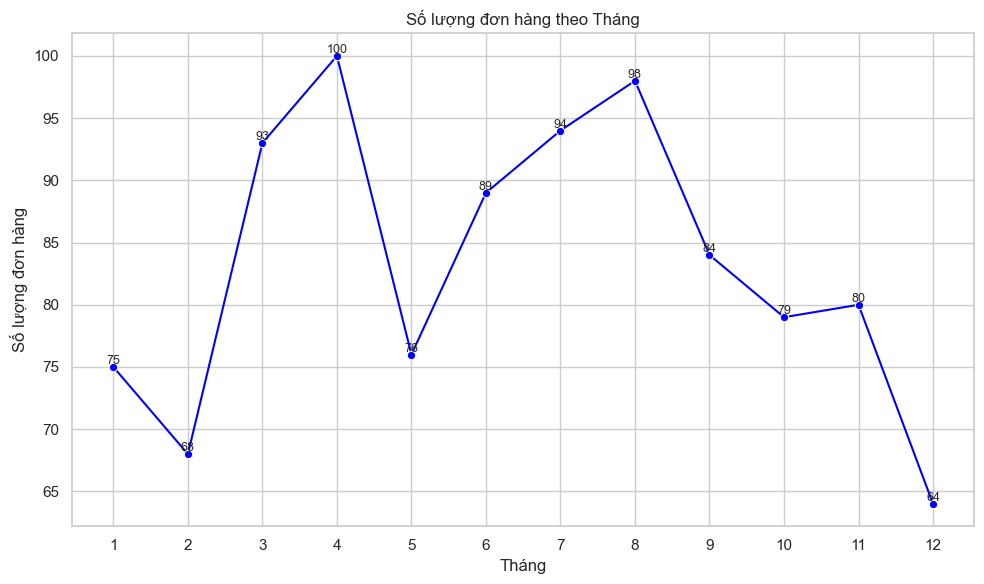

In [ ]:
# 3. Thời điểm mua hàng (Time_of_Purchase)
plt.figure()
monthly_counts = df['Month'].value_counts().sort_index()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', color='blue')
plt.title("Số lượng đơn hàng theo Tháng")
plt.xlabel("Tháng")
plt.ylabel("Số lượng đơn hàng")
for x, y in zip(monthly_counts.index, monthly_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=9)
plt.xticks(range(1, 13))
plt.tight_layout()

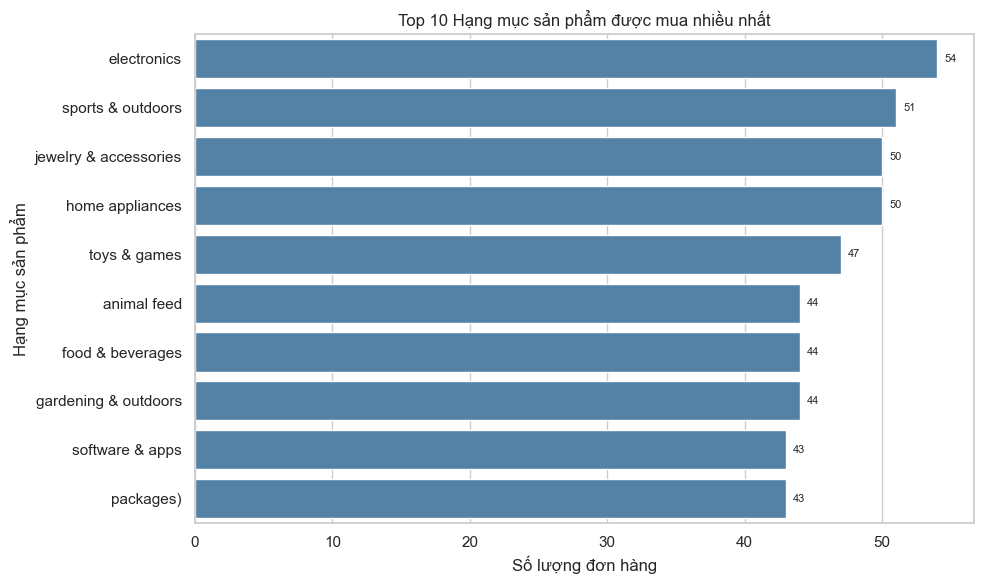

In [ ]:
# 4. Hạng mục sản phẩm (Purchase_Category)
plt.figure()
top_categories = df['Purchase_Category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, color='steelblue')
plt.title("Top 10 Hạng mục sản phẩm được mua nhiều nhất")
plt.xlabel("Số lượng đơn hàng")
plt.ylabel("Hạng mục sản phẩm")
ax = plt.gca()
for i, v in enumerate(top_categories.values):
    ax.text(v + max(top_categories.values)*0.01, i, str(v), va='center', fontsize=8)
plt.tight_layout()

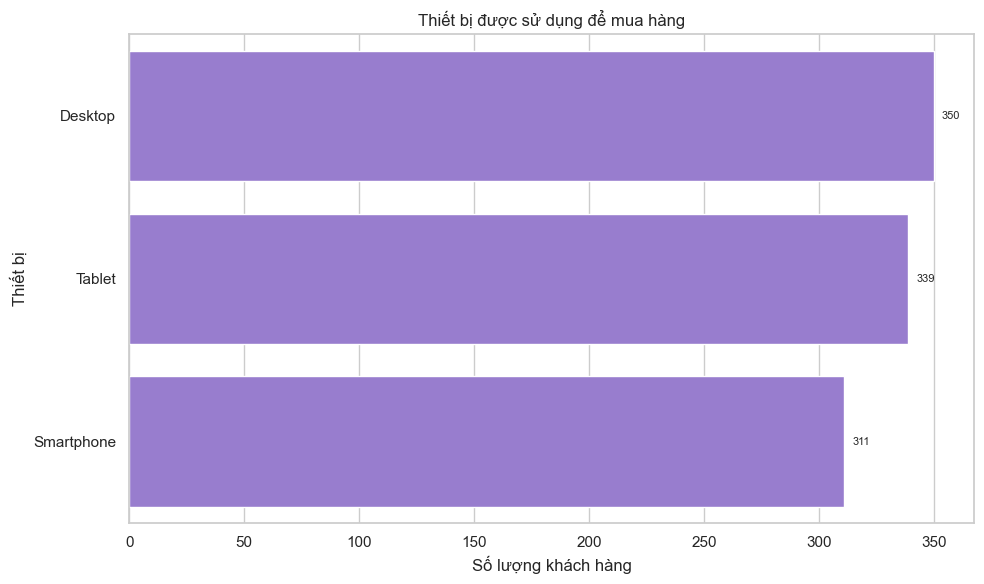

In [ ]:
# 5. Thiết bị sử dụng để mua hàng (Device_Used_for_Shopping)
plt.figure()
device_counts = df['Device_Used_for_Shopping'].value_counts()
sns.barplot(x=device_counts.values, y=device_counts.index, color='mediumpurple')
plt.title("Thiết bị được sử dụng để mua hàng")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Thiết bị")
ax = plt.gca()
for i, v in enumerate(device_counts.values):
    ax.text(v + max(device_counts.values)*0.01, i, str(v), va='center', fontsize=8)
plt.tight_layout()

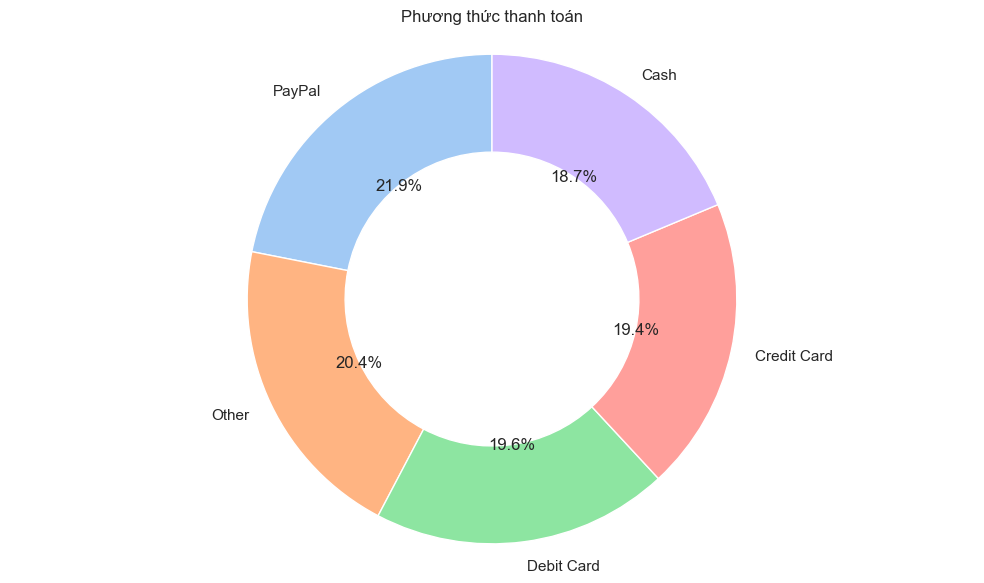

In [ ]:
# 6. Phương thức thanh toán (Payment_Method)
plt.figure()
payment_counts = df['Payment_Method'].value_counts()
colors = sns.color_palette('pastel')[0:len(payment_counts)]
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title("Phương thức thanh toán")
plt.axis('equal')  # Đảm bảo hình tròn
plt.tight_layout()

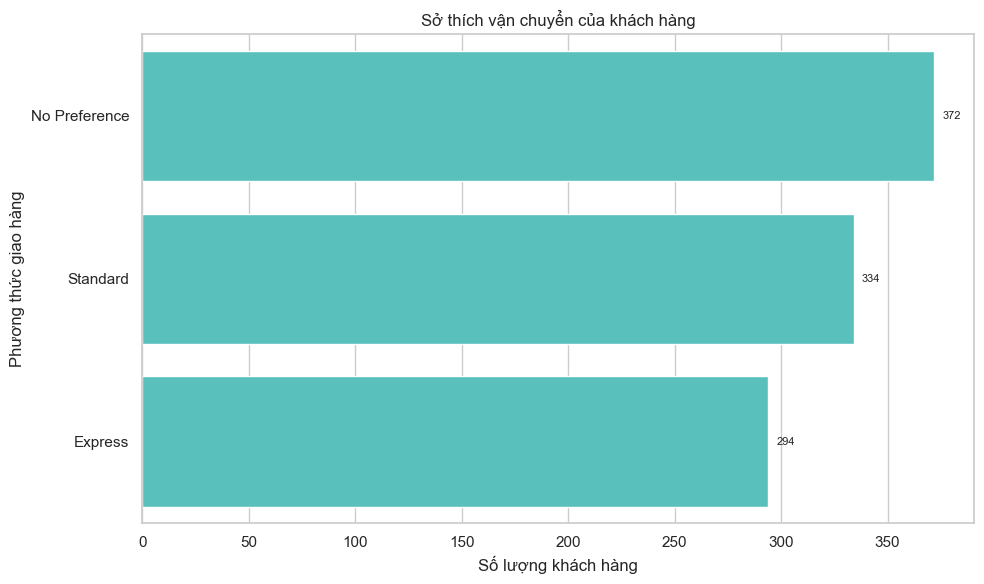

In [ ]:
# 7. Sở thích vận chuyển (Shipping_Preference)
plt.figure()
shipping_counts = df['Shipping_Preference'].value_counts()
sns.barplot(x=shipping_counts.values, y=shipping_counts.index, color='mediumturquoise')
plt.title("Sở thích vận chuyển của khách hàng")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Phương thức giao hàng")
ax = plt.gca()
for i, v in enumerate(shipping_counts.values):
    ax.text(v + max(shipping_counts.values)*0.01, i, str(v), va='center', fontsize=8)
plt.tight_layout()

plt.show()


# Customer_Interactions_and_Behaviors


### PHẦN PHÂN TÍCH MỨC ĐỘ TƯƠNG TÁC VÀ HÀNH VI CỦA KHÁCH HÀNG ĐỐI VỚI SẢN PHẨM VÀ QUẢNG CÁO
Trong thời đại số, việc phân tích tương tác và hành vi của khách hàng khi tiếp cận với quảng cáo trở nên cực kỳ quan trọng. Những hành động như nhấp vào quảng cáo, thời gian dừng lại trên nội dung, hay mức độ tương tác với thương hiệu đều phản ánh mức độ quan tâm thực sự của họ. Thông qua đó, chúng ta có thể xác định ai là người tiếp cận quảng cáo nhiều nhất và mức độ gắn kết của họ với thông điệp truyền tải. Và giờ, ta sẽ làm rõ điều này qua các biểu đồ phân tích sau đây để hiểu rõ hơn về hành vi tương tác của khách hàng.

Đầu tiên, có thể rất nhiều người đã từng đặt câu hỏi: “Liệu nam và nữ có sự khác biệt trong cách họ dành thời gian để tìm hiểu sản phẩm trước khi mua hay không?”

Để trả lời cho câu hỏi này, ta cùng phân tích biểu đồ mật độ phân bố thời gian tìm hiểu sản phẩm theo giới tính (Male vs Female).

Từ biểu đồ, ta có thể rút ra một số nhận định đáng chú ý về hành vi tìm hiểu sản phẩm của khách hàng:

1.Đa số khách hàng không dành quá nhiều thời gian để tìm hiểu sản phẩm Có một mật độ rất cao tập trung quanh mức 0 giờ — điều này cho thấy phần lớn người tiêu dùng ra quyết định khá nhanh, hoặc gần như không tìm hiểu trước khi mua.

2.Tuy nhiên, khi đã tìm hiểu, họ thường dành hẳn hàng giờ để nghiên cứu kỹ Biểu đồ có thêm hai đỉnh rõ rệt tại khoảng 1 giờ và 2 giờ, cho thấy có những nhóm khách hàng cụ thể dành một lượng lớn thời gian để tìm hiểu, có thể là những người kỹ tính, mua hàng giá trị cao, hoặc thiên về lý trí.

3.So sánh nam và nữ: không quá chênh lệch, nhưng có xu hướng khác biệt nhẹ
• Trong khoảng dưới 1.5 giờ, đường mật độ của nữ cao hơn → nữ giới thường là những người dành thời gian ngắn nhưng vẫn tìm hiểu kỹ lưỡng.
• Ngược lại, từ sau mốc 1.5 giờ trở đi, mật độ của nam bắt đầu nhỉnh hơn, cho thấy một nhóm nam giới dành thời gian nghiên cứu rất kỹ trước khi quyết định.

Bên cạnh đó thì việc cân nhắc có nên mua một sản phẩm hay không thì ta cũng rất hay đắn đo suy nghĩ, dù là đã tìm hiểu kỹ nhưng hầu như mọi người sẽ có xu hướng cân nhắc lại một lần nữa, vì thế ta nên tìm hiểu về vấn đề đó bằng biểu đồ dưới đây

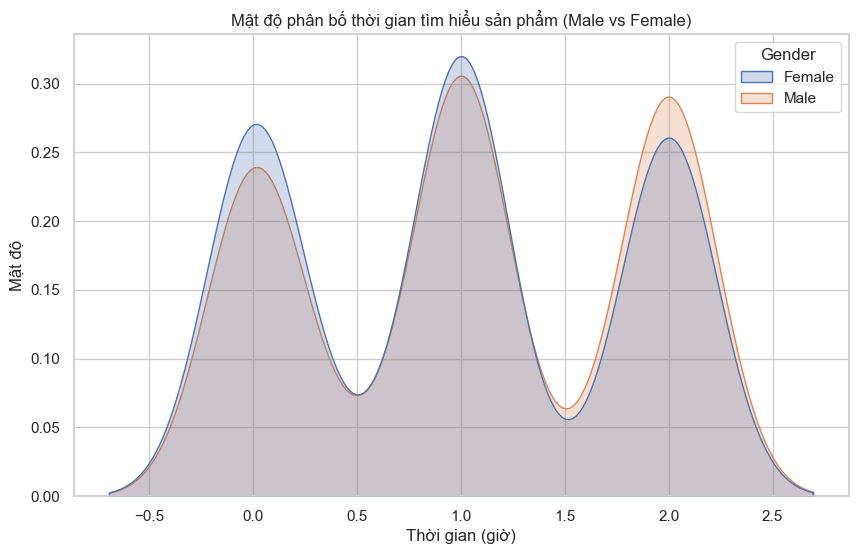

In [ ]:
# Lọc dữ liệu chỉ lấy Male và Female
df_gender = df[df['Gender'].isin(['Male', 'Female'])]

sns.kdeplot(data=df_gender, x='Time_Spent_on_Product_Research(hours)', hue='Gender', fill=True)
plt.title("Mật độ phân bố thời gian tìm hiểu sản phẩm (Male vs Female)")
plt.xlabel("Thời gian (giờ)")
plt.ylabel("Mật độ")
plt.show()

### Biểu đồ Phân Bố Thời Gian Cân Nhắc Mua Hàng Theo Mức Thu Nhập

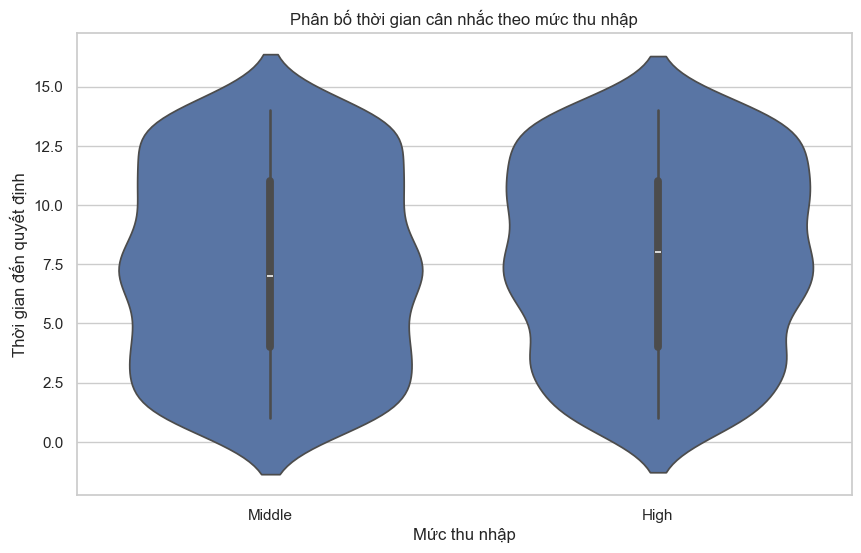

In [ ]:
sns.violinplot(x='Income_Level', y='Time_to_Decision', data=df)
plt.title("Phân bố thời gian cân nhắc theo mức thu nhập")
plt.xlabel("Mức thu nhập")
plt.ylabel("Thời gian đến quyết định")
plt.show()


***Nhận định chi tiết:***
1.Phân bố thời gian từ 0–5 giờ: Phần đáy của violin (0–5 giờ) của nhóm thu nhập Middle phình to hơn, cho thấy nhiều khách hàng ở nhóm này quyết định nhanh hơn - họ dành ít thời gian để cân nhắc.
2.Phân bố từ 5–7.5 giờ: Cả hai nhóm đều có sự phình ra, nhưng từ mốc 5 giờ trở đi, nhóm High lại chiếm ưu thế rõ rệt với phần thân violin rộng hơn, phản ánh nhiều người thu nhập cao có xu hướng dành nhiều thời gian hơn để suy nghĩ trước khi mua.
3.Boxplot bên trong violin: Trung vị (median) của nhóm High cao hơn so với nhóm Middle, cho thấy trung bình người có thu nhập cao cân nhắc lâu hơn.

Người tiêu dùng có thu nhập cao thường dành nhiều thời gian hơn để cân nhắc trước khi mua hàng. Điều này có thể phản ánh sự cẩn trọng, kỳ vọng cao hơn về sản phẩm, hoặc liên quan đến việc họ mua các mặt hàng giá trị lớn hơn.

Hầu như hiện nay các doanh nghiệp đều tập trung vào quảng cáo để thu hút thêm người dùng, vậy ta sẽ đi tìm hiểu thêm vài vấn đề giữa người dùng và quảng cáo để biết chi tiết hơn, liệu quảng cáo có thật sự hiệu quả? Và người dùng cảm thấy như thế nào giữa quảng cáo và sản phẩm thực tế?


### Biểu Đồ Phân Tích Mức Độ Tương Tác Với Quảng Cáo Theo Giới Tính


Biểu đồ grouped bar chart thể hiện sự khác biệt về mức độ tương tác với quảng cáo (Engagement_with_Ads) giữa hai giới tính: Male và Female.
• Trục X: Phân loại mức độ tương tác thành 3 nhóm: Low, Medium, High.
• Trục Y: Số lượng khách hàng trong từng nhóm.
• Mỗi nhóm được chia thành 2 cột theo giới tính: nữ (màu xanh) và nam (màu cam).

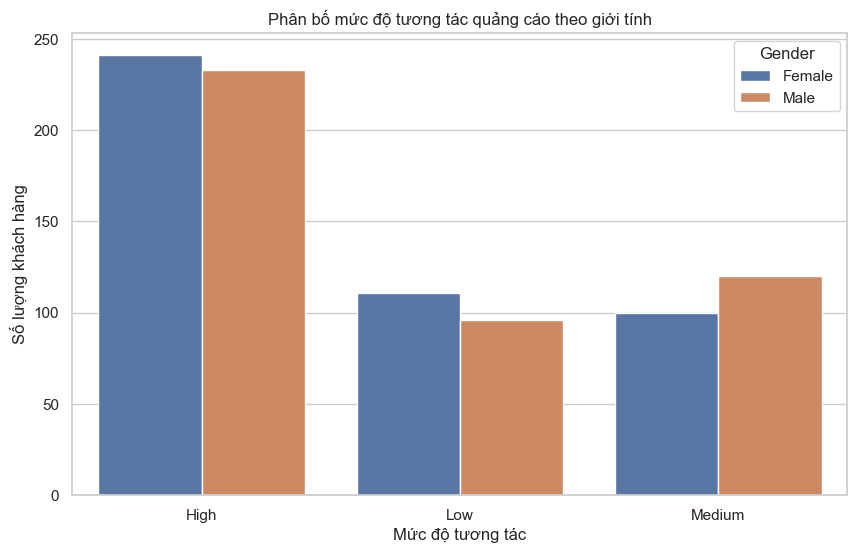

In [ ]:
sns.countplot(x='Engagement_with_Ads', hue='Gender', data=df_genderMF)
plt.title("Phân bố mức độ tương tác quảng cáo theo giới tính")
plt.xlabel("Mức độ tương tác")
plt.ylabel("Số lượng khách hàng")
plt.show()


**Nhận xét sơ qua ta thấy được các điều sau:**

1.Tương tác cao (High): Số lượng nữ có mức tương tác cao nhỉnh hơn nam, cho thấy phụ nữ có xu hướng dễ bị thu hút hơn bởi quảng cáo khi cảm thấy hứng thú.
2.Tương tác trung bình (Medium): Ở mức này, nam lại chiếm ưu thế nhẹ, cho thấy họ có thể thường xuyên tiếp xúc với quảng cáo nhưng chưa chắc đã bị thuyết phục mạnh.
3. Tương tác thấp (Low): Bất ngờ là số lượng nữ trong nhóm tương tác thấp lại cao hơn nam, có thể phản ánh rằng không phải tất cả phụ nữ đều quan tâm đến quảng cáo - sự quan tâm có tính phân cực hơn.
Tổng thể:
• Sự chênh lệch giữa nam và nữ ở từng mức tương tác là không lớn, cho thấy quảng cáo ảnh hưởng đến cả hai giới tương đối đồng đều, tuy có một số xu hướng nhỏ theo từng mức độ.
• Phụ nữ có xu hướng nằm ở hai thái cực — hoặc rất quan tâm, hoặc gần như không để ý đến quảng cáo. Trong khi đó, nam giới phân bổ đều hơn, đặc biệt ở nhóm tương tác trung bình.

Vì thế việc phân loại nội dung quảng cáo phù hợp với từng nhóm là vô cùng quan trọng
Ví dụ:
• Nữ giới: Tăng cường quảng cáo cảm xúc và hình ảnh bắt mắt để thu hút nhóm tương tác cao, đồng thời cần cải thiện nội dung với nhóm ít quan tâm.
• Nam giới: Nội dung nên rõ ràng, trực tiếp, dễ tiếp cận để giữ sự chú ý và thúc đẩy chuyển đổi từ nhóm tương tác trung bình.



### Phân Tích Mức Độ Hài Lòng Của Khách Hàng Theo Mức Độ Tương Tác Với Quảng Cáo


Biểu đồ sử dụng boxplot để thể hiện sự phân bố điểm hài lòng của khách hàng (Customer Satisfaction, thang điểm 1–10) theo từng mức độ tương tác với quảng cáo (Engagement_with_Ads) gồm ba nhóm:
• Trục X: Nhóm tương tác Low, Medium, High.
• Trục Y: Mức độ hài lòng với sản phẩm.

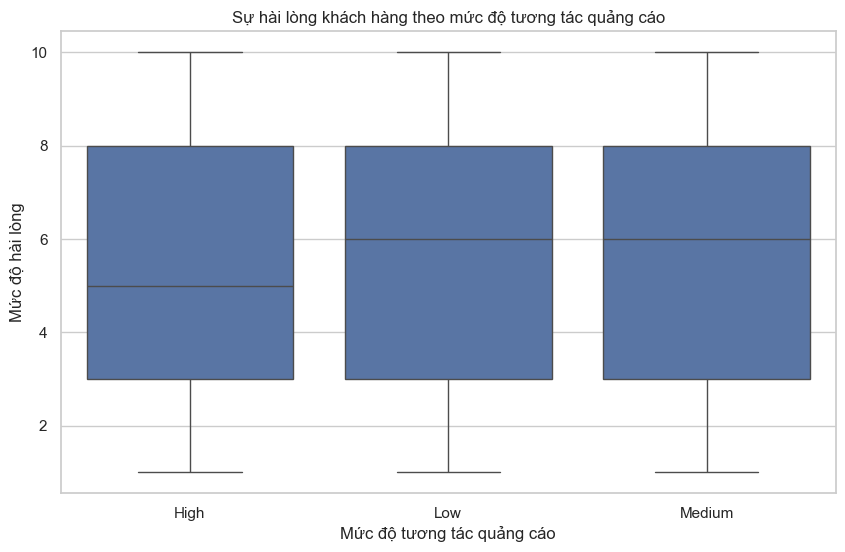

In [ ]:
sns.boxplot(x='Engagement_with_Ads', y='Customer_Satisfaction', data=df)
plt.title("Sự hài lòng khách hàng theo mức độ tương tác quảng cáo")
plt.xlabel("Mức độ tương tác quảng cáo")
plt.ylabel("Mức độ hài lòng")
plt.show()


**Nhận xét chi tiết:**
• Các hộp boxplot giữa các nhóm có chiều cao và phạm vi phân bố gần như tương tự nhau, cho thấy sự phân tán điểm hài lòng là tương đối giống nhau giữa các nhóm.
• Tuy nhiên, điểm khác biệt đáng chú ý nằm ở đường trung vị (median):
• Nhóm Low và Medium đều có median ở khoảng mức 6, cho thấy khách hàng trong hai nhóm này nhìn chung có mức độ hài lòng trung bình-khá.
• Trong khi đó, nhóm High lại có median thấp hơn, khoảng mức 5, cho thấy khách hàng tương tác quảng cáo nhiều hơn lại không hài lòng bằng nhóm còn lại.


Quảng cáo có thể tạo kỳ vọng cao, nhưng nếu sản phẩm không đáp ứng được thì dẫn đến sự thất vọng. Hoặc khách hàng tương tác nhiều với quảng cáo là những người còn đang cân nhắc, hoài nghi hơn với sản phẩm, và sau cùng có trải nghiệm không tốt như kỳ vọng.
Qua đó ta thấy các chiến lược quảng cáo cần đảm bảo sự nhất quán giữa thông điệp quảng cáo và chất lượng sản phẩm, tránh việc “thổi phồng” làm kỳ vọng vượt thực tế. Với nhóm tương tác cao, doanh nghiệp có thể đầu tư vào trải nghiệm sau mua, như hỗ trợ khách hàng, hậu mãi… để cải thiện mức độ hài lòng.

### Phân Tích Mối Liên Hệ Giữa Ảnh Hưởng Mạng Xã Hội Và Mục Đích Mua Hàng

Biểu đồ thể hiện mức độ ảnh hưởng của mạng xã hội đến mục đích mua hàng
Biểu đồ là một heatmap (bản đồ nhiệt) thể hiện tần số khách hàng theo 2 chiều:
• Trục Y: Mức độ ảnh hưởng bởi mạng xã hội (Social Media Influence) - gồm các mức: Low, Medium, High.
• Trục X: Mục đích mua hàng (Purchase Intent) - gồm các nhóm: Impulsive: Mua bốc đồng, Need-based: Mua vì nhu cầu thiết yếu, Planned: Mua có kế hoạch trước, Wants-based: Mua vì mong muốn/cảm xúc cá nhân

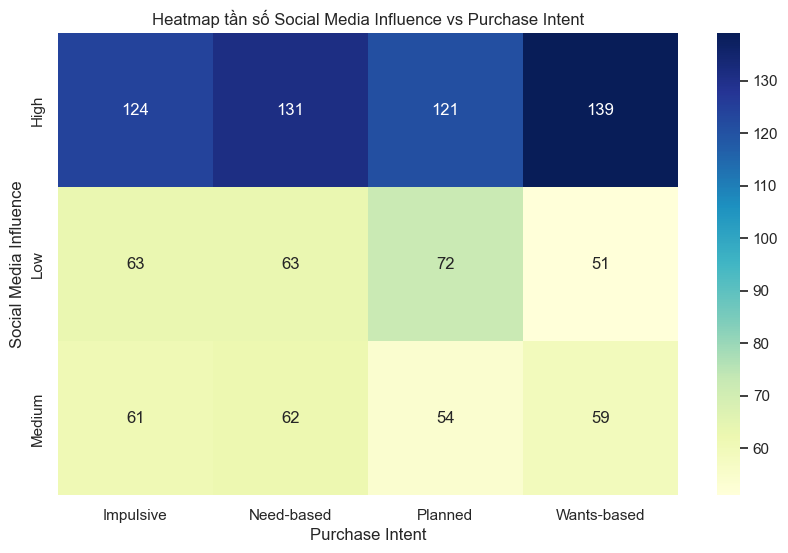

In [ ]:

ct = pd.crosstab(df['Social_Media_Influence'], df['Purchase_Intent'])

sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap tần số Social Media Influence vs Purchase Intent')
plt.xlabel('Purchase Intent')
plt.ylabel('Social Media Influence')
plt.show()

Màu sắc càng đậm thể hiện số lượng khách hàng trong nhóm đó càng nhiều.
• Ở mức ảnh hưởng mạng xã hội thấp (Low): Khách hàng chủ yếu mua theo kiểu Planned (có kế hoạch). Điều này cho thấy khi ít bị ảnh hưởng bởi mạng xã hội, khách hàng thường mua sắm có chủ đích, suy nghĩ kỹ hơn.
• Ở mức Medium: Phân bố khá đều giữa các kiểu mua, không có nhóm nào vượt trội. Điều này cho thấy mức ảnh hưởng trung bình thì khó dự đoán xu hướng rõ ràng.
• Ở mức ảnh hưởng cao (High): Số lượng khách hàng mua theo kiểu Wants-based (mong muốn/cảm xúc) là cao nhất. Ngược lại, nhóm Planned lại rất thấp, gần như ít có khách hàng lập kế hoạch rõ ràng

Điều này cho thấy khi bị mạng xã hội ảnh hưởng mạnh, khách hàng dễ bị cảm xúc chi phối, dễ mua theo cảm hứng hoặc mong muốn hơn là theo nhu cầu thực tế.
Mạng xã hội càng ảnh hưởng mạnh, hành vi mua càng thiên về cảm xúc và ít tính toán. Điều này mở ra cơ hội cho các chiến dịch quảng bá cảm xúc, truyền cảm hứng, đặc biệt trên nền tảng mạng xã h### ội.


Kết Luận
Dựa trên các biểu đồ đã phân tích, có thể kết luận rằng hành vi tương tác với quảng cáo và hành vi mua hàng của khách hàng chịu ảnh hưởng bởi nhiều yếu tố như giới tính, thu nhập, thời gian cân nhắc, và mức độ tác động từ mạng xã hội.

Cụ thể, nữ giới có xu hướng tương tác với quảng cáo nhiều hơn nam ở cả mức thấp và cao, trong khi nam giới lại chiếm ưu thế ở mức trung bình. Tuy nhiên, tương tác cao với quảng cáo không đồng nghĩa với sự hài lòng cao. Trái lại, nhóm khách hàng có mức độ tương tác cao lại ghi nhận điểm hài lòng thấp hơn nhóm còn lại, cho thấy rằng quảng cáo nếu không đi đôi với trải nghiệm thực tế tốt thì dễ gây thất vọng.

	Về hành vi mua hàng, nam giới thường dành thời gian tìm hiểu sản phẩm lâu hơn, cho thấy sự cân nhắc kỹ lưỡng hơn so với nữ giới. Người có thu nhập cao cũng có xu hướng ra quyết định chậm hơn, chứng tỏ họ thận trọng hơn trước khi mua. Đáng chú ý, khách hàng bị ảnh hưởng mạnh bởi mạng xã hội lại có xu hướng mua sắm theo cảm xúc hoặc mong muốn (wants-based), trong khi người ít bị ảnh hưởng lại có hành vi mua hàng có kế hoạch rõ ràng hơn (planned).

Từ đó, có thể thấy rằng việc xây dựng chiến lược marketing hiệu quả không chỉ dựa vào việc tạo quảng cáo bắt mắt mà cần hiểu rõ tâm lý, thói quen và đặc điểm hành vi của từng nhóm khách hàng. Quảng cáo cần được thiết kế phù hợp với từng nhóm mục tiêu, đồng thời đảm bảo chất lượng sản phẩm/dịch vụ để giữ vững sự hài lòng và lòng trung thành của khách hàng.


# Phân cụm khách hàng

In [ ]:
#Kiểm tra dl
df.columns = df.columns.str.strip()  # loại bỏ khoảng trắng thừa có thể có
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (1000, 29)
Columns: ['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Marital_Status', 'Education_Level', 'Occupation', 'Location', 'Purchase_Category', 'Purchase_Amount', 'Frequency_of_Purchase', 'Purchase_Channel', 'Brand_Loyalty', 'Product_Rating', 'Time_Spent_on_Product_Research(hours)', 'Social_Media_Influence', 'Discount_Sensitivity', 'Return_Rate', 'Customer_Satisfaction', 'Engagement_with_Ads', 'Device_Used_for_Shopping', 'Payment_Method', 'Time_of_Purchase', 'Discount_Used', 'Customer_Loyalty_Program_Member', 'Purchase_Intent', 'Shipping_Preference', 'Time_to_Decision', 'Month']


,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Month
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,évry,gardening & outdoors,333.80,...,High,Tablet,Credit Card,2024-03-01,True,False,Need-based,No Preference,2,3
1,29-392-9296,49,Male,High,Married,High School,High,huocheng,food & beverages,222.22,...,High,Tablet,PayPal,2024-04-16,True,False,Wants-based,Standard,6,4
2,84-649-5117,24,Female,Middle,Single,Master's,High,huzhen,office supplies,426.22,...,Low,Smartphone,Debit Card,2024-03-15,True,True,Impulsive,No Preference,3,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,wiwilí,home appliances,101.31,...,High,Smartphone,Other,2024-10-04,True,True,Need-based,Express,10,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,nara,furniture,211.70,...,High,Smartphone,Debit Card,2024-01-30,False,False,Wants-based,No Preference,4,1


## 2. Tính/chuẩn bị các đặc trưng

- **Tổng số đơn hàng**: count theo mỗi `Customer_ID`  
- **Tổng chi tiêu**: sum của `Purchase_Amount`  
- **Tần suất mua**: lấy từ `Frequency_of_Purchase` (cột đã có sẵn)  
- **Age**, **Gender**

In [ ]:
# Aggregate theo khách hàng
agg = (
    df.groupby('Customer_ID')
      .agg(
          Total_Orders = ('Customer_ID', 'count'),
          Total_Spending = ('Purchase_Amount', 'sum'),
          Frequency_of_Purchase = ('Frequency_of_Purchase', 'mean'),
          Age = ('Age', 'first'),
          Gender = ('Gender', 'first')
      )
      .reset_index(drop=True)
)

agg.head()


,Total_Orders,Total_Spending,Frequency_of_Purchase,Age,Gender
0,1,178.04,5.0,36,Female
1,1,464.76,2.0,28,Female
2,1,128.01,2.0,26,Male
3,1,68.02,10.0,20,Female
4,1,302.74,11.0,24,Female


## 3. One‑hot encode cột `Gender`
ta cần chuyển Gender thành biến nhị phân (0/1) để mô hình Thuật toán phân cụm (như KMeans, DBSCAN) hiểu được.
Male sẽ là 1, Female là 0

In [ ]:
# 3. One‑hot encode cột Gender
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')
gender_ohe = ohe.fit_transform(agg[['Gender']])
gender_cols = ohe.get_feature_names_out(['Gender'])
df_gender = pd.DataFrame(gender_ohe, columns=gender_cols, index=agg.index)

# 4. Kết hợp features
Tạo một bảng dữ liệu X gồm các đặc trưng số đã chọn, chuẩn bị cho bước chuẩn hóa và phân cụm (KMeans/DBSCAN).

In [ ]:
X = pd.concat([
    agg[['Total_Orders','Total_Spending','Frequency_of_Purchase','Age']],
    df_gender
], axis=1)
display(X.head())


,Total_Orders,Total_Spending,Frequency_of_Purchase,Age,Gender_Agender,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,1,178.04,5.0,36,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,464.76,2.0,28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,128.01,2.0,26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,68.02,10.0,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,302.74,11.0,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# 5. Chuẩn hóa dữ liệu
Chuẩn hóa dữ liệu để:
Đưa các đặc trưng (feature) về cùng một thang đo (scale).
Tránh hiện tượng đặc trưng có đơn vị lớn (ví dụ: "Total_Spending") chi phối kết quả phân cụm so với đặc trưng nhỏ (ví dụ: "Age", "Gender_Male").
Là bắt buộc nếu bạn dùng các thuật toán phân cụm dựa trên khoảng cách, như KMeans hoặc DBSCAN.

In [ ]:
# 5.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 6a. Áp dụng KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)
agg['Cluster_KM'] = labels_km
print("KMeans cluster sizes:")
print(pd.Series(labels_km).value_counts().sort_index())

KMeans cluster sizes:
0    512
1    449
2     19
3     20
Name: count, dtype: int64


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [ ]:
# 6b. Tính profile trung bình của mỗi cụm
profile = agg.groupby('Cluster_KM').agg({
    'Total_Orders':'mean',
    'Total_Spending':'mean',
    'Frequency_of_Purchase':'mean',
    'Age':'mean'
}).round(2)
print("Cluster profiling:\n", profile)
# 6c. Đặt tên cho từng cụm dựa trên profile
name_map = {
    0: 'High-Spend, Low-Freq',
    1: 'Low-Spend, Low-Freq',
    2: 'Medium-Spend, High-Freq',
    3: 'High-Spend, High-Freq'
}
agg['Segment'] = agg['Cluster_KM'].map(name_map)

Cluster profiling:
             Total_Orders  Total_Spending  Frequency_of_Purchase    Age
Cluster_KM                                                            
0                    1.0          283.40                   6.91  33.84
1                    1.0          267.62                   6.94  34.84
2                    1.0          243.78                   7.47  34.58
3                    1.0          258.47                   7.40  33.85


**7.Mục tiêu đoạn code:**
   - Giảm chiều dữ liệu chuẩn hóa (X_scaled) xuống 2 chiều (2D) bằng PCA.
   - Vẽ biểu đồ phân cụm theo kết quả của thuật toán KMeans.

In [ ]:
# 6d. Giảm chiều với PCA 2D
pca = PCA(n_components=2, random_state=42)
pc = pca.fit_transform(X_scaled)
agg['PC1'], agg['PC2'] = pc[:,0], pc[:,1]

# 6e. Tọa độ centroids trên không gian PCA
centroids_2d = pca.transform(kmeans.cluster_centers_)


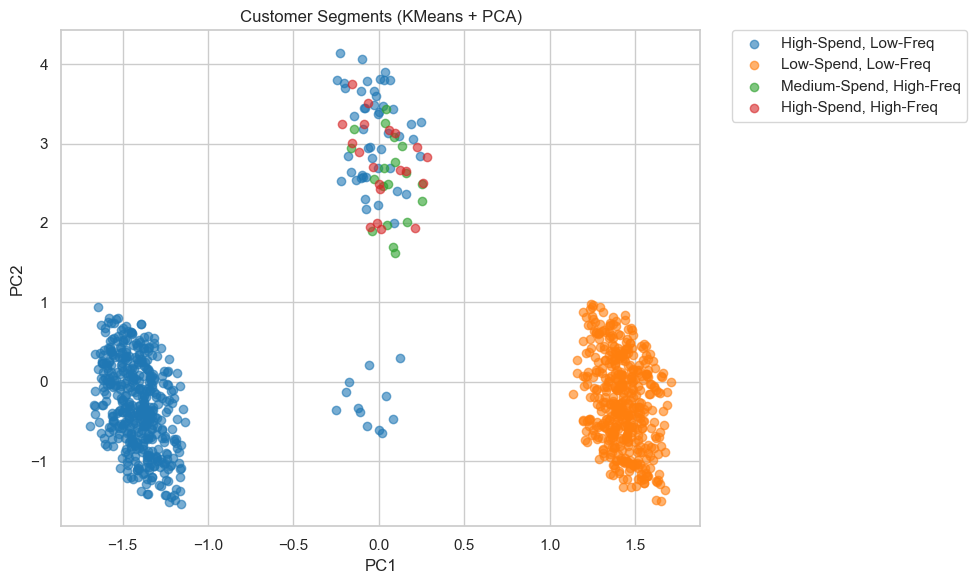

In [ ]:
# 6f. Vẽ scatter với centroids và tên segment
plt.figure(figsize=(10,6))
colors = ['tab:blue','tab:orange','tab:green','tab:red']
for c, color in zip(sorted(agg['Cluster_KM'].unique()), colors):
    pts = agg[agg['Cluster_KM']==c]
    plt.scatter(pts['PC1'], pts['PC2'], label=name_map[c], alpha=0.6, color=color)

# Centroids
#plt.scatter(centroids_2d[:,0], centroids_2d[:,1],
            #marker='X', s=200, c='black', label='Centroids')

# Đẩy legend ra ngoài
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Customer Segments (KMeans + PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


Biểu đồ trên mô tả kết quả phân cụm KMeans (k=4) sau khi giảm chiều về 2D bằng PCA, với mỗi cụm đã được gán tên (“segment”) dựa trên profile trung bình:

**High‑Spend, Low‑Freq (xanh dương):**
Vị trí: phân tán bên trái, PC1 thấp, PC2 quanh 0
Đặc trưng: chi tiêu cao nhất, tần suất mua thấp nhất
Đề xuất: đây là nhóm “big spender” nhưng mua không thường xuyên.
Tạo ưu đãi định kỳ (ví dụ voucher tháng),
Mời tham gia membership cao cấp,
Gửi reminder hoặc sản phẩm “best‑seller” để kích hoạt mua thêm.

**Low‑Spend, Low‑Freq (cam):**
Vị trí: bên phải, PC1 cao, PC2 quanh 0
Đặc trưng: chi tiêu thấp, tần suất cũng thấp
Đề xuất: nhóm khách lẻ, chưa có gắn kết.
Khuyến mãi giảm giá sâu cho mặt hàng phù hợp,
Chiến dịch gửi ưu đãi chào mừng,
Khảo sát nhanh để hiểu nguyên nhân họ ít quay lại.

**Medium‑Spend, High‑Freq (xanh lá):**
Vị trí: cụm nhỏ, PC1 gần 0, PC2 cao (~3)
Đặc trưng: chi tiêu trung bình, mua rất đều đặn
Đề xuất: nhóm “regular shopper”.
Cross‑sell / Upsell sản phẩm bổ sung,
Khuyến khích dùng subscription (dịch vụ định kỳ),
Tặng điểm thưởng cho mỗi lần mua.

**High‑Spend, High‑Freq (đỏ):**
Vị trí: xung quanh cụm xanh lá nhưng tách ra chút
Đặc trưng: vừa chi tiêu lớn, vừa mua nhiều
Đề xuất: VIP customers.
Ưu tiên dịch vụ cá nhân hóa,
Mời tham gia event exclusive,
Quà tặng sinh nhật, access test sản phẩm mới.

In [ ]:
# 7a. Áp dụng DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)
agg['Cluster_DB'] = labels_db
print("\nDBSCAN cluster sizes (–1 = noise):")
print(pd.Series(labels_db).value_counts().sort_index())



DBSCAN cluster sizes (–1 = noise):
-1      29
 0     452
 1     449
 2      14
 3      12
 4       5
 5       5
 6      15
 7       5
 8       6
 9       5
 10      3
Name: count, dtype: int64


DBSCAN cluster profile:


,Total_Orders,Total_Spending,Frequency_of_Purchase,Age
Cluster_DB,,,,
-1,1.0,264.02,7.10,35.69
0,1.0,282.09,6.88,33.88
1,1.0,267.62,6.94,34.84
2,1.0,279.99,6.64,28.50
3,1.0,234.29,9.33,38.92
4,1.0,344.01,2.80,26.60
5,1.0,155.03,10.20,45.60
6,1.0,301.36,7.67,34.53
7,1.0,286.00,4.40,37.60


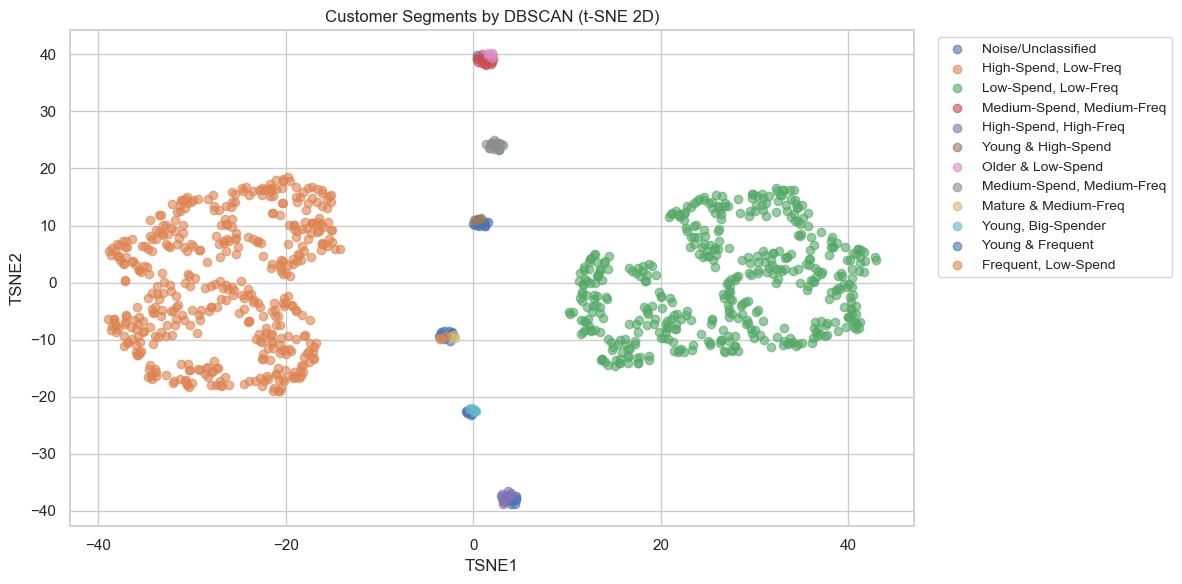

In [ ]:
# 1. Tính profile trung bình mỗi cụm DBSCAN
profile_db = agg.groupby('Cluster_DB').agg({
    'Total_Orders': 'mean',
    'Total_Spending': 'mean',
    'Frequency_of_Purchase': 'mean',
    'Age': 'mean'
}).round(2)
print("DBSCAN cluster profile:")
display(profile_db)

# 2. Đặt tên cho từng cụm (tự chỉnh theo kết quả profile_db của bạn)
name_map_db = {
    -1: 'Noise/Unclassified',
     0: 'High-Spend, Low-Freq',
     1: 'Low-Spend, Low-Freq',
     2: 'Medium-Spend, Medium-Freq',
     3: 'High-Spend, High-Freq',
     4: 'Young & High-Spend',
     5: 'Older & Low-Spend',
     6: 'Medium-Spend, Medium-Freq',
     7: 'Mature & Medium-Freq',
     8: 'Young, Big-Spender',
     9: 'Young & Frequent',
    10: 'Frequent, Low-Spend'
}

# Áp map vào DataFrame
agg['Segment_DB'] = agg['Cluster_DB'].map(name_map_db)

# 3. t-SNE 2D
tsne = TSNE(n_components=2, random_state=42, init='pca')
tsne_comp = tsne.fit_transform(X_scaled)
agg['TSNE1'], agg['TSNE2'] = tsne_comp[:,0], tsne_comp[:,1]

# 4. Vẽ scatter với segment names
plt.figure(figsize=(12,6))
for c in sorted(agg['Cluster_DB'].unique()):
    pts = agg[agg['Cluster_DB']==c]
    label = name_map_db.get(c, f'Cluster {c}')
    plt.scatter(pts['TSNE1'], pts['TSNE2'], label=label, alpha=0.6)

plt.title('Customer Segments by DBSCAN (t-SNE 2D)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.grid(True)

# Legend ngoài khung
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small', frameon=True)
plt.tight_layout()
plt.show()


Biểu đồ trên cho ta cái nhìn tổng quan về 12 phân khúc khách hàng được DBSCAN tìm ra (cộng thêm nhóm noise), trực quan hóa trên mặt phẳng t‑SNE:

- **Giải thích & nhận xét:**
  - **Nhóm lớn bên trái (DB 0: “High‑Spend, Low‑Freq”)**
    - Màu cam, tập trung quanh TSNE1 ≈ –25.
    - Chi tiêu rất cao (Total_Spending lớn) nhưng mua không thường xuyên (Frequency thấp).
    
  - **Nhóm lớn bên phải (DB 1: “Low‑Spend, Low‑Freq”)**
    - Màu xanh lá, tập trung quanh TSNE1 ≈ +25.
    - Chi tiêu và tần suất đều thấp → khách hàng lẻ, chưa gắn kết.
    
  - **Hàng loạt “micro‑segments” xung quanh:**
    - Tái hiện các nhóm nhỏ như:
      - Medium‑Spend, Medium‑Freq
      - High‑Spend, High‑Freq – khách VIP thường xuyên
      - Young & High‑Spend, Young & Frequent, Young, Big‑Spender
      - Older & Low‑Spend, Mature & Medium‑Freq
      - Frequent, Low‑Spend
    - Mỗi nhóm này có hành vi rất đặc thù về độ tuổi, chi tiêu, tần suất.
    
  - **Nhiễu:**
    - Một số khách không vào được cụm nào: có thể do dữ liệu thiếu, hành vi thất thường hoặc nhóm quá nhỏ.

- **Đề xuất hành động:**
  - **High‑Spend, Low‑Freq**
    - Gửi ưu đãi đặc biệt khuyến khích mua lần 2, 3…
    - Mời tham gia membership cao cấp (VIP, free shipping)
    
  - **Low‑Spend, Low‑Freq**
    - Chiến dịch nhắc nhở: email/SMS với coupon hấp dẫn
    - Khảo sát nhanh về lý do ít quay lại
    
  - **Medium‑Spend, Medium‑Freq**
    - Cross‑sell sản phẩm liên quan
    - Tặng điểm tích lũy mỗi lần mua
    
  - **High‑Spend, High‑Freq (VIP)**
    - Tri ân VIP bằng quà tặng, event exclusive
    - Mời làm ambassador chia sẻ trải nghiệm
    
  - **Young & High‑Spend / Frequent**
    - Chiến dịch social media nhắm đúng độ tuổi
    - Flash sale mobile‑app push
    
  - **Older & Low‑Spend**
    - Ưu đãi theo dịp (sinh nhật, lễ)
    - Hỗ trợ tư vấn để tăng trải nghiệm mua sắm
    
  - **Frequent, Low‑Spend**
    - Khuyến khích upsell: bundle, gói combo giá tốt
    - Giới thiệu membership để tăng giá trị trung bình đơn
    
  - **Nhóm Nhiễu:**
    - Tái phân loại sau khi thu thập thêm dữ liệu.
    - Triển khai chiến dịch khám phá nhu cầu (survey, mini‑game).


In [ ]:

# 8. Thống kê trung bình đặc trưng theo cụm KMeans
print("\nMean features by KMeans cluster:")
display(agg.groupby('Cluster_KM')[['Total_Orders','Total_Spending','Frequency_of_Purchase','Age']].mean())


Mean features by KMeans cluster:


,Total_Orders,Total_Spending,Frequency_of_Purchase,Age
Cluster_KM,,,,
0,1.0,283.402402,6.910156,33.843750
1,1.0,267.618463,6.942094,34.837416
2,1.0,243.777368,7.473684,34.578947
3,1.0,258.469500,7.400000,33.850000


**Giải thích:**
- Cluster_KM: Mỗi số đại diện cho một nhóm (cụm) khách hàng được phân theo KMeans.
- Total_Orders: Trung bình số đơn hàng của khách hàng trong cụm. Tất cả đều bằng 1.0, có thể do dữ liệu ban đầu hoặc cách nhóm — nghĩa là mỗi khách hàng trong cụm chỉ có 1 đơn hàng trung bình.
- Total_Spending: Trung bình tổng chi tiêu của khách hàng trong từng cụm. Nhóm 0 chi tiêu cao nhất (~283), nhóm 2 chi tiêu thấp nhất (~243), các nhóm còn lại nằm giữa.
- Frequency_of_Purchase: Tần suất mua sắm trung bình theo cụm. Nhóm 2 và 3 có tần suất mua sắm cao hơn (7.4-7.5 lần), nhóm 0 và 1 thấp hơn (~6.9-6.94).
- Age: Tuổi trung bình của khách hàng trong từng cụm khá đồng đều, dao động quanh 33-35 tuổi.

**Nhận xét:**
- Các cụm có số đơn hàng trung bình bằng nhau, nhưng khác nhau về tổng chi tiêu và tần suất mua sắm.
- Cụm có tổng chi tiêu cao nhất không nhất thiết có tần suất mua sắm cao nhất.
- Tuổi khách hàng tương đối đồng đều, nên có thể tuổi không phải là yếu tố phân biệt lớn giữa các cụm trong trường hợp này.

**Đề xuất hành động:**
- Tập trung marketing theo đặc điểm chi tiêu và tần suất: Ví dụ, nhóm có chi tiêu cao nhưng tần suất thấp có thể được khuyến khích mua thường xuyên hơn.
- Thiết kế ưu đãi hoặc chương trình khách hàng thân thiết dựa trên tần suất mua sắm để tăng sự gắn kết.
- Đi sâu phân tích các yếu tố khác như giới tính, thu nhập, hay loại sản phẩm mua, để có chiến lược cá nhân hóa hơn.

In [ ]:
# 9. Thống kê trung bình đặc trưng theo cụm DBSCAN
print("\nMean features by DBSCAN cluster:")
display(agg.groupby('Cluster_DB')[['Total_Orders', 'Total_Spending', 'Frequency_of_Purchase', 'Age']].mean())



Mean features by DBSCAN cluster:


,Total_Orders,Total_Spending,Frequency_of_Purchase,Age
Cluster_DB,,,,
-1,1.0,264.015172,7.103448,35.689655
0,1.0,282.087854,6.884956,33.884956
1,1.0,267.618463,6.942094,34.837416
2,1.0,279.987857,6.642857,28.500000
3,1.0,234.287500,9.333333,38.916667
4,1.0,344.014000,2.800000,26.600000
5,1.0,155.028000,10.200000,45.600000
6,1.0,301.357333,7.666667,34.533333
7,1.0,286.004000,4.400000,37.600000


**1. Giải thích bảng**
Bảng thể hiện giá trị trung bình của 4 đặc trưng chính (Total_Orders, Total_Spending, Frequency_of_Purchase, Age) cho từng cụm DBSCAN.
Cluster_DB = -1 là nhóm noise (các điểm bị DBSCAN đánh dấu là nhiễu, không thuộc cụm nào).
Các cụm từ 0 đến 10 là các nhóm khách hàng được DBSCAN phân loại dựa trên đặc trưng đã chuẩn hóa.

**2. Nhận xét**
Total_Orders luôn bằng 1.0 cho tất cả các cụm, nghĩa là mỗi khách hàng chỉ có một đơn hàng trong dữ liệu gốc hoặc cột này chưa đa dạng.
Total_Spending biến thiên khá lớn giữa các cụm, từ khoảng 149 đến hơn 400, cho thấy sự khác biệt lớn về mức chi tiêu.
Frequency_of_Purchase cũng khá biến động, có những cụm có tần suất mua hàng cao (như cụm 10: 10.67 lần), có cụm thấp hơn (cụm 4, 8).
Age phân bố từ khoảng 20 tuổi đến gần 46 tuổi, một số cụm có khách hàng trẻ hơn (cụm 9: 20.8 tuổi), số khác trung niên hơn (cụm 5: 45.6 tuổi).
Cụm noise (-1) có mức chi tiêu trung bình, tần suất mua hàng và độ tuổi khá tương đồng với các cụm khác nhưng là những điểm không thể gom nhóm tốt bởi DBSCAN.

**3. Đề xuất hành động**
Phân tích sâu từng cụm khách hàng để cá nhân hóa chiến dịch marketing:
Cụm có mức chi tiêu cao + tần suất mua thấp (vd: cụm 8, 4) có thể là khách hàng tiềm năng cần kích thích mua hàng thường xuyên hơn.
Cụm có tần suất mua cao nhưng chi tiêu thấp (vd: cụm 10, 5) có thể hướng đến chiến lược upsell, cross-sell.
Cụm khách hàng trẻ tuổi (vd: cụm 9) có thể cần các chiến dịch tiếp cận bằng kênh truyền thông số, mạng xã hội.
Cụm khách hàng lớn tuổi hơn (vd: cụm 5) có thể quan tâm đến các ưu đãi đặc biệt hoặc sản phẩm phù hợp theo độ tuổi.
Xử lý cụm noise (-1):
Đây là nhóm khách hàng không dễ phân loại, có thể cần xem xét thêm các đặc trưng khác hoặc dữ liệu bổ sung để phân loại tốt hơn.
Hoặc có thể làm riêng chiến dịch ưu đãi để thử tiếp cận và quan sát phản hồi.
Kiểm tra lại cột Total_Orders vì dữ liệu có vẻ không đa dạng (luôn bằng 1.0), nếu có thể thu thập thêm dữ liệu về số đơn hàng thực tế sẽ giúp phân nhóm chính xác hơn.
Tiếp tục áp dụng thêm các thuật toán phân nhóm khác để so sánh kết quả, hoặc điều chỉnh tham số DBSCAN (eps, min_samples) để có nhóm cụm tốt hơn.

# Dự Đoán Hành Vi Chi Tiêu Khách Hàng

## 1. Phân loại nhóm chi tiêu (Spending Group Classification)
Mục tiêu: Phân loại khách hàng thành 3 nhóm chi tiêu: Low, Medium, High dựa trên dữ liệu hành vi.

Dữ liệu sử dụng: Tập dữ liệu loại bỏ các cột không cần thiết như Customer_ID, Purchase_Amount, Time_of_Purchase.

Mô hình sử dụng:

- Logistic Regression

- Random Forest Classifier

In [ ]:
df = pd.read_csv('Cleaned_Ecommerce_Data.csv')

In [ ]:
#PHÂN LOẠI NHÓM CHI TIÊU
# Tạo cột nhóm chi tiêu theo Purchase_Amount
df['Spending_Group'] = pd.qcut(df['Purchase_Amount'], q=3, labels=['Low', 'Medium', 'High'])

y_cls = LabelEncoder().fit_transform(df['Spending_Group'])
X_cls = df.drop(columns=['Customer_ID', 'Purchase_Amount', 'Time_of_Purchase', 'Spending_Group'])

# Mã hóa các biến phân loại
for col in X_cls.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    X_cls[col] = le.fit_transform(X_cls[col].astype(str))


In [ ]:
# Chia dữ liệu phân loại
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, stratify=y_cls, test_size=0.2, random_state=42)



Logistic Regression
              precision    recall  f1-score   support

         Low       0.36      0.40      0.38        67
      Medium       0.40      0.40      0.40        67
        High       0.34      0.29      0.31        66

    accuracy                           0.36       200
   macro avg       0.36      0.36      0.36       200
weighted avg       0.36      0.36      0.36       200



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


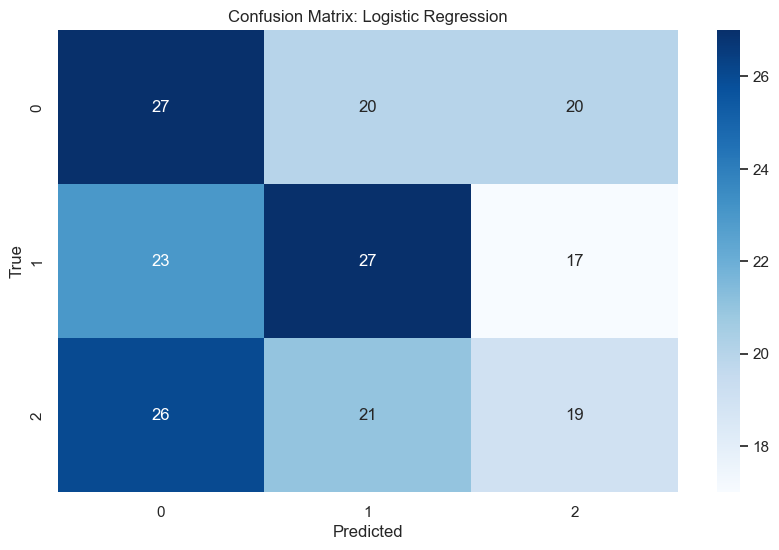


Random Forest
              precision    recall  f1-score   support

         Low       0.35      0.39      0.37        67
      Medium       0.29      0.24      0.26        67
        High       0.31      0.33      0.32        66

    accuracy                           0.32       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.32      0.32      0.32       200



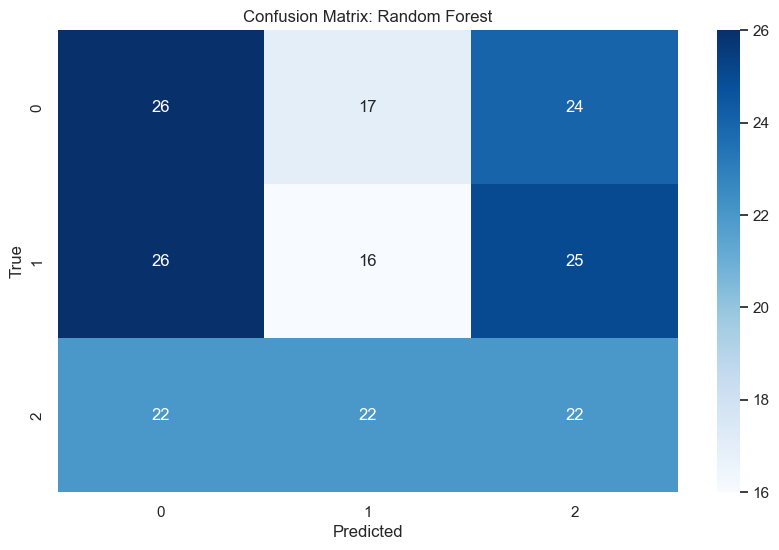

In [ ]:
# Huấn luyện 2 mô hình phân loại
cls_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42)
}
for name, model in cls_models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    print(f"\n{name}")
    print(classification_report(y_test_cls, y_pred, target_names=['Low', 'Medium', 'High']))
    cm = confusion_matrix(y_test_cls, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


### Đánh giá mô hình Logistic Regression
+ Mô hình cho thấy khả năng phân loại các nhóm rất hạn chế
+ Đặc thù phi tuyến của dữ liệu về hành vi chi tiêu cho thấy mô hình tuyến tính hiện tại không phải là lựa chọn tối ưu.

### Đánh giá mô hình Random Forest Classifier:
- Hiệu suất phân loại của mô hình Random Forest còn hạn chế (độ chính xác tổng thể chỉ 32%), có thể là do các đặc trưng chưa đủ sức phân biệt hoặc dữ liệu huấn luyện chưa đủ.
- Quan sát cho thấy các nhóm Low, Medium, High không tách biệt rõ ràng trong không gian đặc trưng, dẫn đến việc khó khăn trong việc phân loại chính xác các mẫu.


## 2. Dự báo chi tiêu (Purchase Amount Regression)
Mục tiêu: Dự đoán số tiền chi tiêu (Purchase_Amount) dựa vào thông tin khách hàng.

Dữ liệu sử dụng: Đã mã hóa nhãn và xử lý các biến phân loại.

Mô hình sử dụng:
- Linear Regression
- Random Forest Regressor
- XGBoost Regressor

In [ ]:
#HỒI QUY DỰ BÁO PURCHASE_AMOUNT
y_reg = df['Purchase_Amount']
X_reg = df.drop(columns=['Customer_ID', 'Purchase_Amount', 'Time_of_Purchase', 'Spending_Group'])

# Mã hóa dữ liệu
for col in X_reg.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    X_reg[col] = le.fit_transform(X_reg[col].astype(str))



In [ ]:
# Chia tập dữ liệu
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)



In [ ]:
# Huấn luyện 3 mô hình hồi quy
reg_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(objective='reg:squarederror', random_state=42)
}
for name, model in reg_models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    r2 = r2_score(y_test_reg, y_pred)
    mae = mean_absolute_error(y_test_reg, y_pred)
    print(f"\n{name}")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.2f}")


Linear Regression
R²: -0.0051
MAE: 114.81

Random Forest Regressor
R²: -0.0658
MAE: 117.93

XGBoost Regressor
R²: -0.3176
MAE: 123.52


### Đánh giá mô hình
Cả ba mô hình Linear Regression, Random Forest Regressor, XGBoost Regressor đều cho thấy hiệu suất rất kém trong việc dự đoán biến mục tiêu trên tập dữ liệu này.
Linear Regression:
- R² = 0.0173: Giá trị này rất gần 0, cho thấy mô hình tuyến tính chỉ giải thích được chưa đến 2% phương sai của biến mục tiêu. Điều này có nghĩa là mô hình này không hiệu quả hơn đáng kể so với việc chỉ dự đoán giá trị trung bình của biến mục tiêu.
- MAE = 114.81: Đây là sai số tuyệt đối trung bình. Mặc dù có giá trị thấp nhất trong ba mô hình, chúng ta cần biết thang đo của biến mục tiêu để đánh giá xem sai số này có chấp nhận được hay không, nhưng dựa trên R² rất thấp, sai số này khả năng cao là lớn so với phạm vi biến thiên của dữ liệu.

Random Forest Regressor:
- R² = -0.0443: Giá trị âm của R² cho thấy mô hình này hoạt động tệ hơn cả việc chỉ dự đoán giá trị trung bình của biến mục tiêu. Đây là một kết quả rất đáng báo động về sự phù hợp của mô hình hoặc dữ liệu.
- MAE = 117.93: Cao hơn Linear Regression một chút, củng cố thêm việc mô hình này dự đoán kém.

XGBoost Regressor:
- R² = -0.2946: Giá trị âm R² lớn nhất trong ba mô hình, cho thấy XGBoost là mô hình hoạt động tệ nhất, dự đoán sai lệch rất nhiều so với giá trị trung bình.
- MAE = 123.52: Có MAE cao nhất, xác nhận XGBoost đưa ra dự đoán kém chính xác nhất trong ba mô hình này.